Первым делом — знакомимся с датасетом.

В этом модуле мы будем работать с таблицами о футбольных матчах и командах.

Таблицы этого модуля, как и все другие в курсе, лежат в схеме sql в Metabase. Нам понадобятся teams и matches.

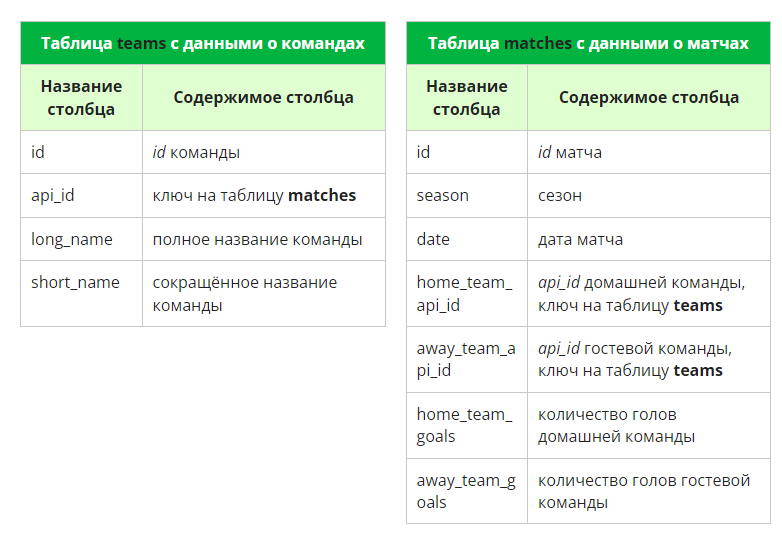

Сколько различных полных названий команд в таблице teams?

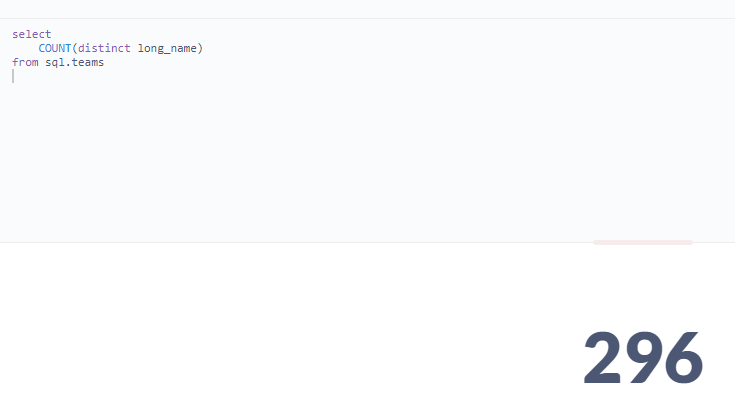

Сколько в таблице teams команд с коротким названием VAL?

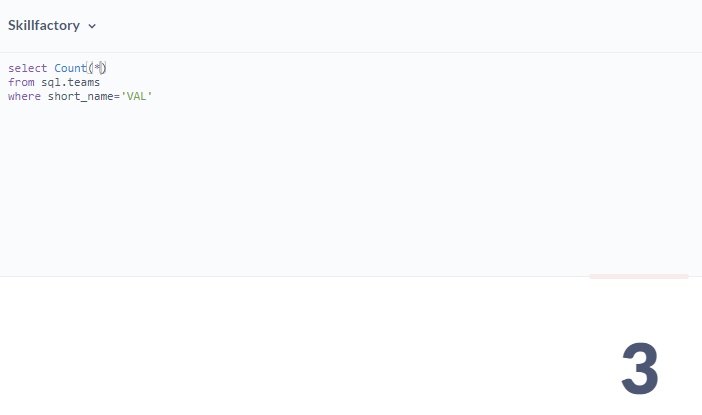

Данные за какие сезоны даны в таблице matches?

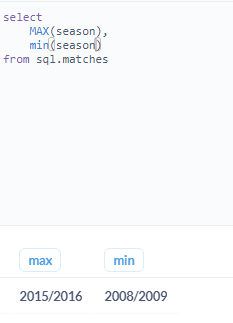

Напишите запрос, который выведет сезон (season), а также общее количество забитых мячей домашними (total_home_goals) и гостевыми (total_away_goals) командами.

Отсортируйте по столбцу с сезоном в порядке возрастания.

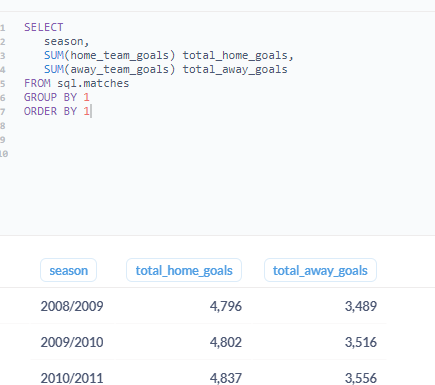

Существует несколько способов соединения таблиц. Мы познакомимся со всеми основными операторами, которые используются для этих нужд, но начнём с простого метода объединения таблиц — без операторов.

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе from. Что произойдёт в таком случае?

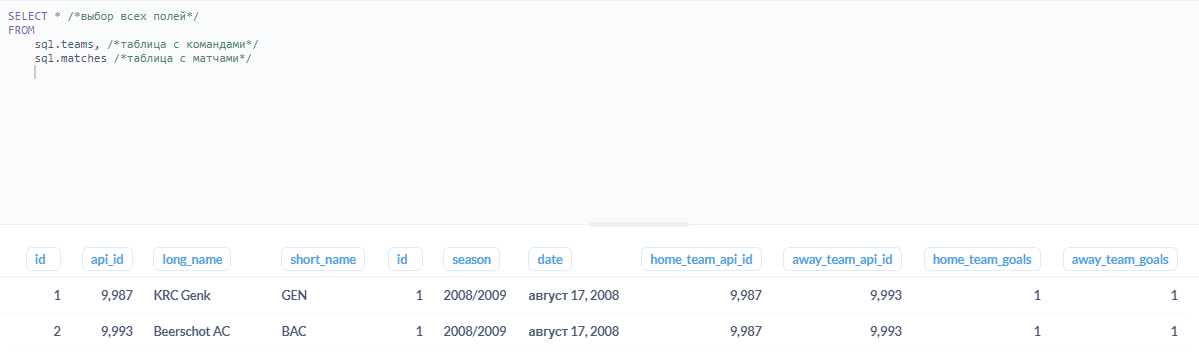

Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

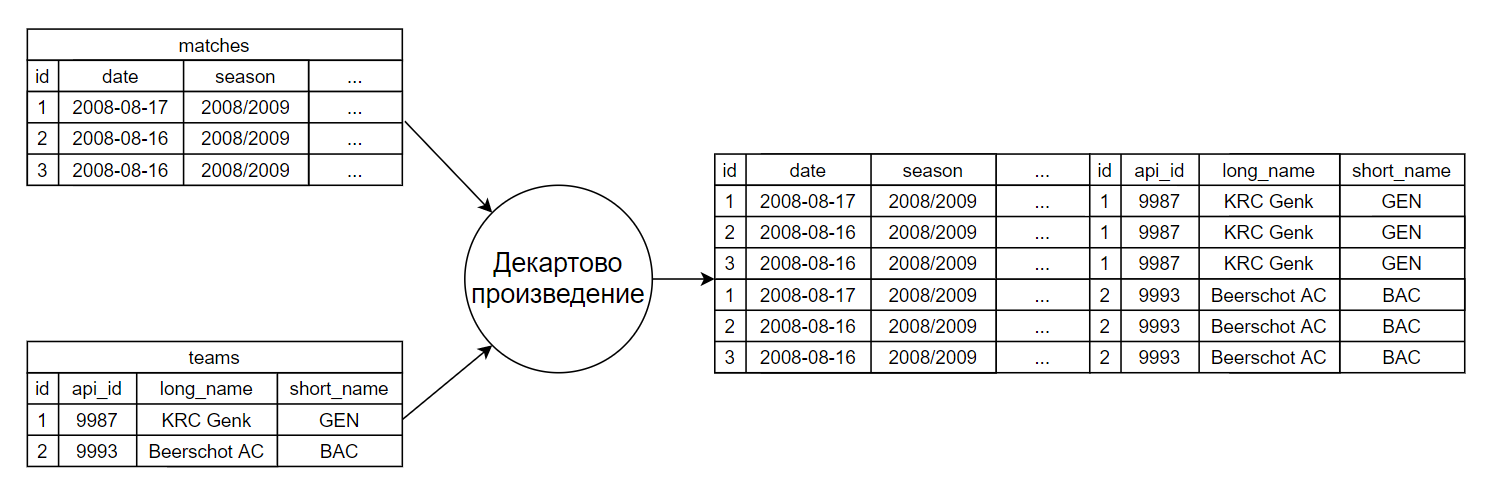

Действительно ли это произведение? Легко проверить!

В исходных таблицах teams и matches было 299 и 25083 записей соответственно. Если соединить каждую запись одной таблицы с каждой записью другой, получится 299 * 25083 записей в итоговой таблице.

Напишите запрос, который выведет количество строк соединённой таблицы.

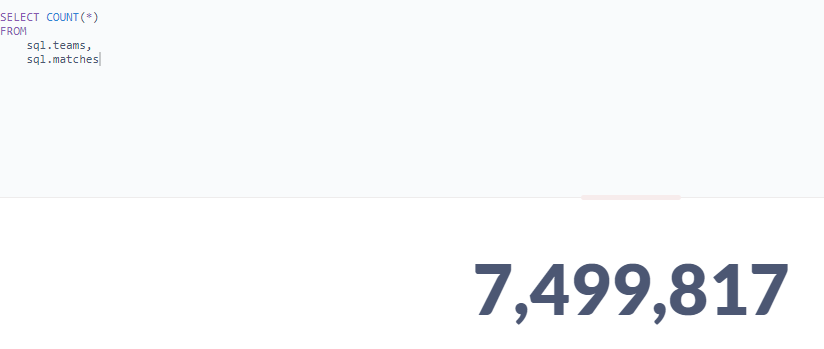

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — это ключи таблиц, по которым они соединяются.

Ключ — это поле (столбец) в таблице, которое однозначно позволяет идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие

where home_team_api_id = api_id.

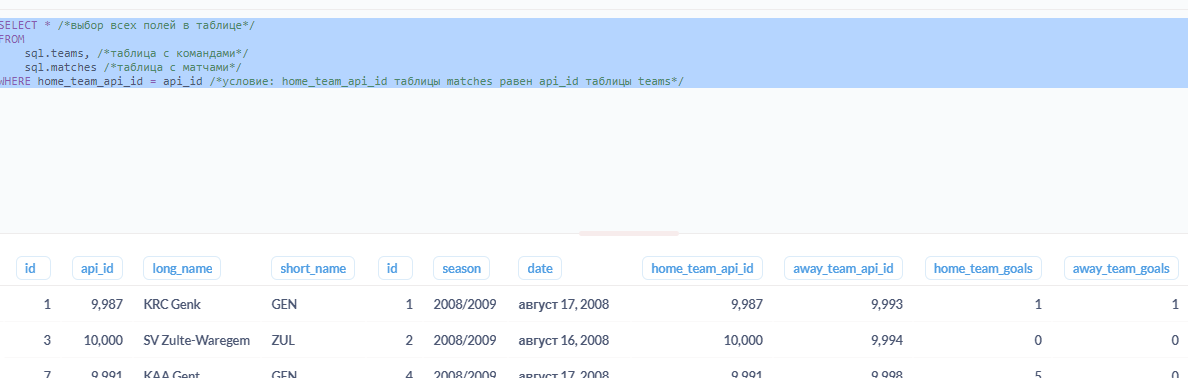

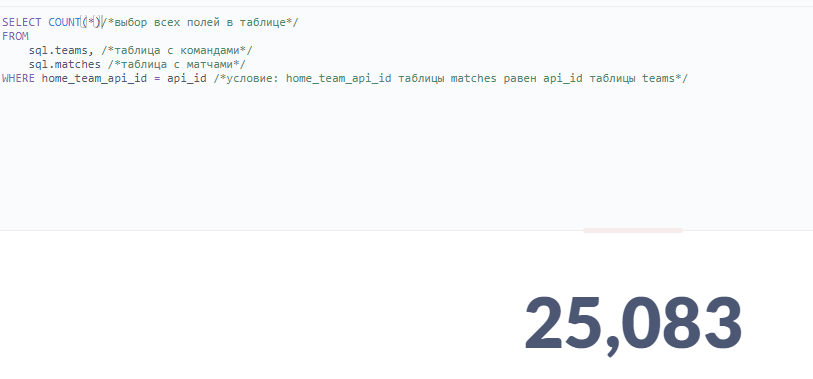

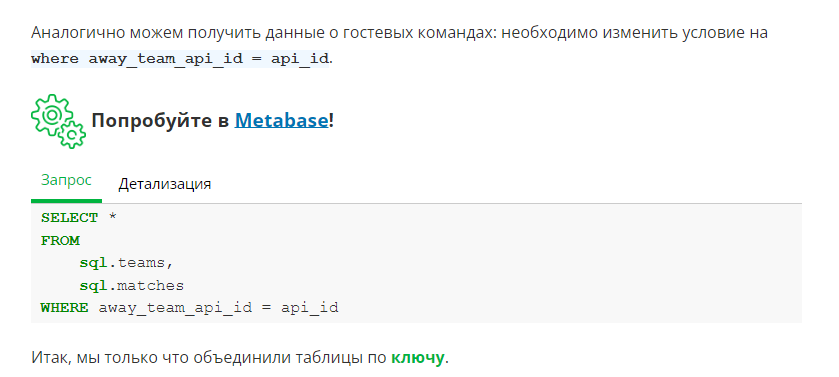

Вы уже знакомы с ключами по таблице pokemon (там в этой роли выступал столбец id). Ключи нужны для того, чтобы иметь возможность не перепутать между собой различные записи.

Например, у нас есть несколько команд с одинаковым названием: Polonia Bytom, Widzew Łódź и Royal Excel Mouscron — хотя это разные команды, с разными id.

Кроме того, как мы уже смогли убедиться, ключи используются для соединения таблиц между собой.

Ключи бывают двух основных типов:

Primary — первичный ключ — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.
Foreign — внешний ключ — представляет собой ссылку на другую таблицу.

Обратите внимание! В данном датасете ключ api_id таблицы teams может быть использован в разных значениях. Его можно использовать для того, чтобы получить информацию о домашней (home) или гостевой (away) команде.

Вы могли заметить, что в последних двух запросах получилось очень много столбцов. Как и при работе с одиночной таблицей, мы можем выбирать, какие столбцы соединённой таблицы выводить.

С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

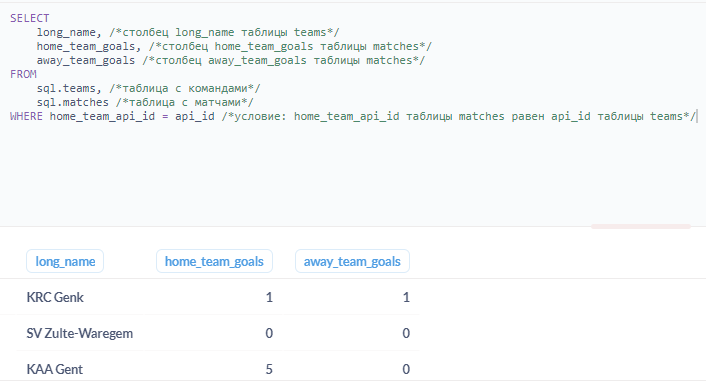

Напишите запрос, который выведет таблицу с результатами матчей для гостевых команд, содержащую:

названия гостевых команд (long_name),

количество забитых мячей домашней команды (home_team_goals),

количество забитых мячей гостевой команды (away_team_goals).

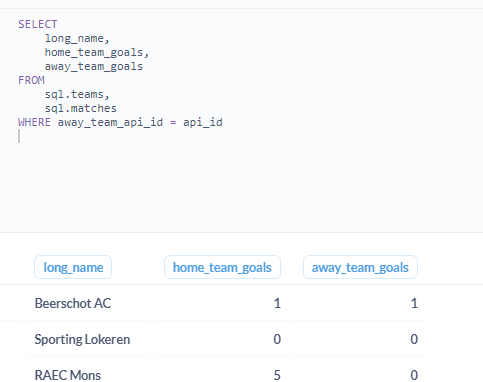

В прошлом юните для соединения таблиц мы использовали условие в разделе where, чтобы показать принцип работы оператора JOIN.

JOIN — это оператор SQL, который позволяет соединять таблицы по условию.

Предлагаем вам посмотреть короткое видео о возможностях оператора JOIN.

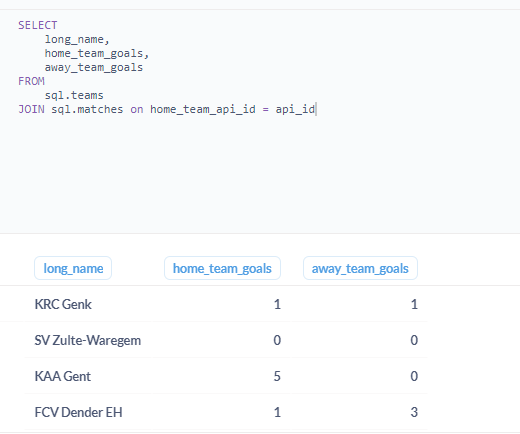

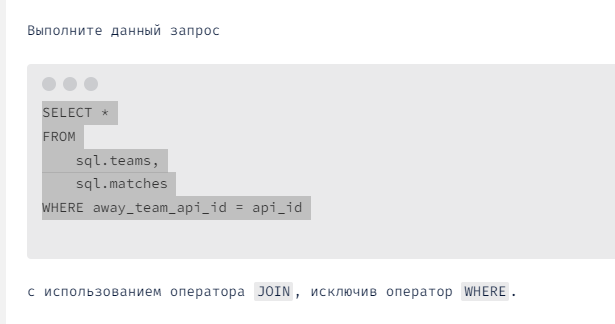

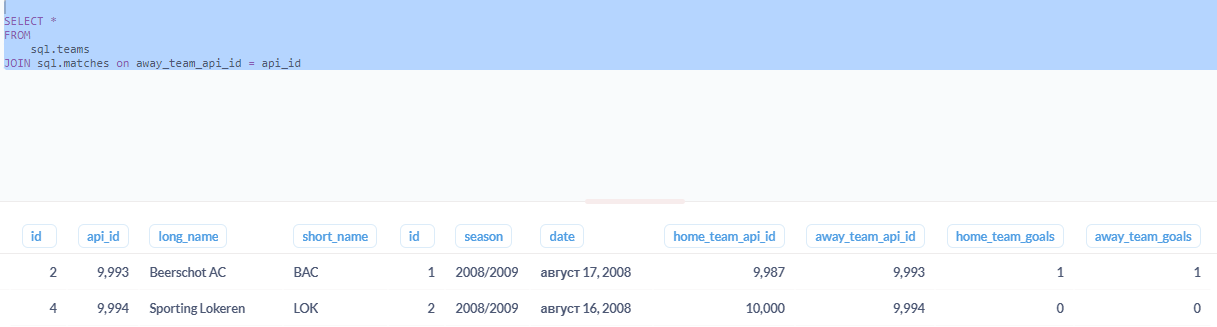

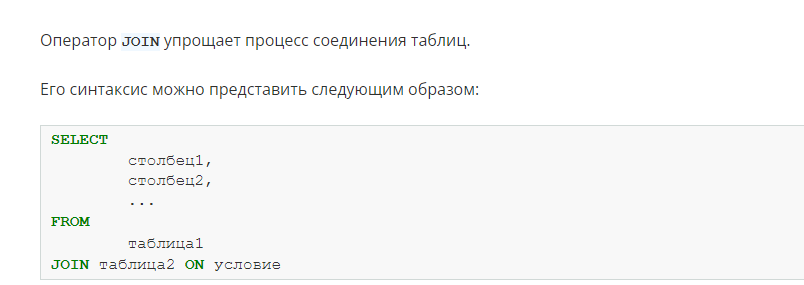

Порядок присоединения таблиц в данном случае не важен — результат будет одинаковым.

С помощью JOIN можно соединить и более двух таблиц.

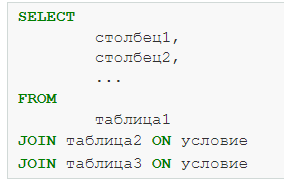

В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

К примеру, столбец id есть и в таблице matches, и в таблице teams. Такой запрос не будет обработан.

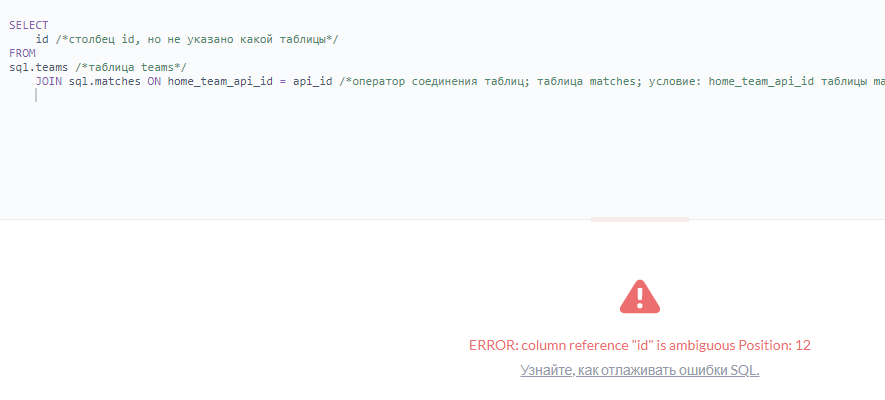

В результате должно появиться сообщение об ошибке вроде такого: “... column id is ambiguous ...”

Что же делать в таком случае?

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

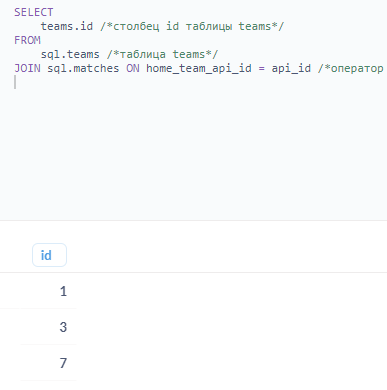

Можно также выбрать и столбец из таблицы matches.

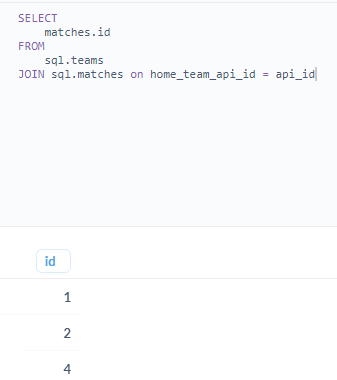

Зачастую названия таблиц слишком длинные, так что использовать их неудобно.

Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — алиасы (от анг. alias).

Синтаксис для указания алиаса такой же, как и для названия столбца.

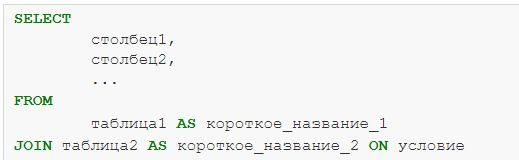

Если необходимо записать название на русском языке (“таблица1”) или с пробелом (“table 2”), то алиас можно обернуть в кавычки.

Важно! Обращаться по такому алиасу придётся также с помощью кавычек.

Использование таких алиасов считается плохой практикой как минимум по двум причинам:

1) обращаться с такими алиасами неудобно;
2) названия на кириллице можно задать не во всех СУБД.

Вместо алиасов с кавычками рекомендуется давать простое короткое название на латинице, без специальных символов и пробелов. Если таблиц немного и все названия начинаются с разных букв, можно присваивать алиасы по первой букве.

Ключевое слово as, как и в названии столбца, можно опустить в большинстве СУБД.

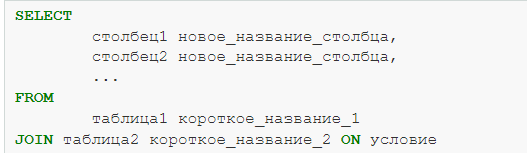

Напишите запрос, который выведет два столбца: id матча (match_id) и id домашней команды (team_id). Отсортируйте по id матча в порядке возрастания значений.

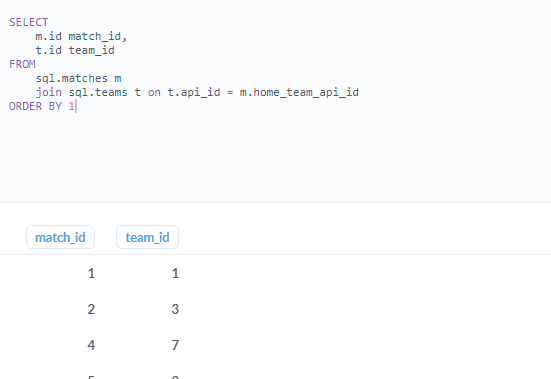

Кажется, теперь мы можем соединить таблицы между собой и создать своё табло со счётом матчей, как на спортивных сайтах!

Давайте с помощью запроса SQL получим таблицу, содержащую:

название домашней команды;

количество забитых голов домашней командой;

количество забитых голов гостевой командой;

название гостевой команды.

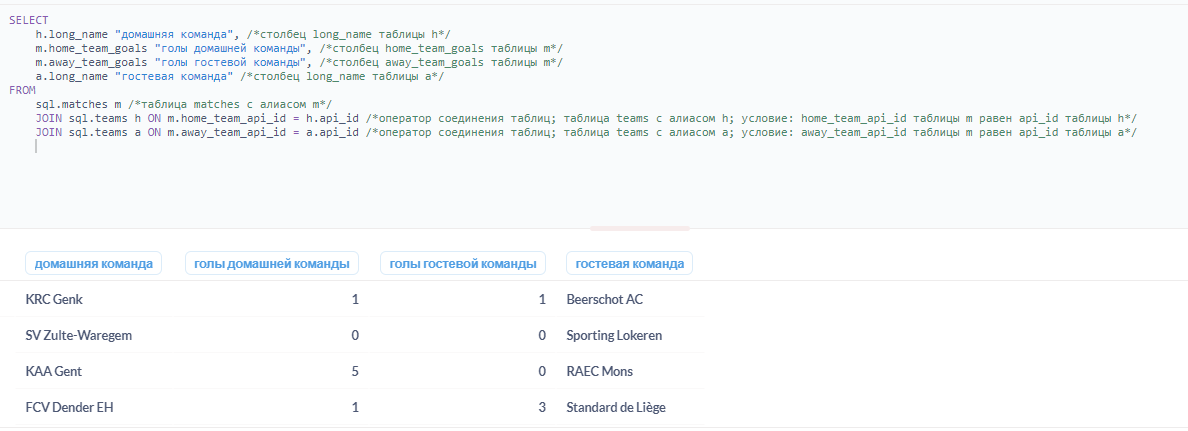

Напишите запрос, который выведет столбцы:

id матча,
короткое название домашней команды (home_short),

короткое название гостевой команды (away_short).

Отсортируйте запрос по возрастанию id матча.

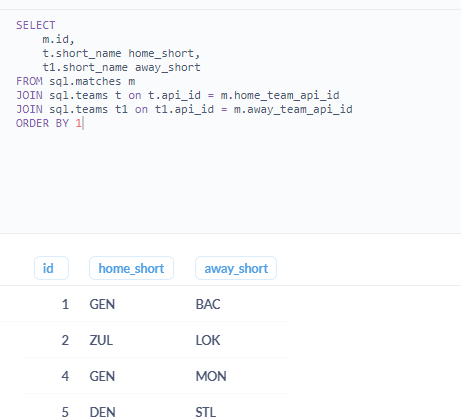